# Data Sciece House Price Prediction Test

Python v3.13.2 was used for this project

## Objective

Build a complete machine learning pipeline using the provided housing data to estimate home sale prices based on various property characteristics. The primary objective is to **develop a robust prediction model**. We will be using linear regression for this prediction.


<!-- It is recommended that the final model use linear regression, although using a different model will not be rewarded or punished.-->

## Data Description

**LotArea**: (int) Total area of the lot property [square feet] 

**GrLivArea**:(int) Total ground living area of the property [square feet]

**Street**: (string) Describes the condition of the street the property is located on 
- Pave: Paved road
- Grvl: Gravel road

**Alley**: Describes the condition of the alley the property is located on. NA if no alley 
- Pave: Paved road
- Grvl: Gravel road

**LotType**: (string) Describes the type of lot the property is 
- Corner: A corner home
- Inside: A lot surrounded by lots on all three sides
- CulDSac: Property that sits on a dead-end rounded street, facing other houses and creating a close-knit feeling between neighbors
- FR2: Frontage on 2 sides of property
- FR3: Frontage on 3 sides of property

**BldgType**: (String) The type of property that is on the lot. 
- 1Fam: Home for 1 family
- Twnhs: Townhouse 
- Duplex: Duplex (2 home property)
- 2fmCon: Converted Two-family dwelling
- TwnhsE: Townhouse End Unit - A townhouse that is on the end of a row

**HouseStyle**: (*string*) Describes the style of property
- 1Fam: Single-family home
- SFoyer: Split Foyer - house with a main foyer that has stairs leading both up and down to different levels
- 2Story: Two-story home
- 1Story: One-story home
- 2.5Unf: Two and a half story home (unfinished)
- 2.5Fin: Two and a half story home (finished)
- 1.5Fin: One and a half story home (finished)
- SLvl: Split Level -  home design where floor levels are staggered
- 1.5Unf: One and a half story home (unfinished)

**OverallQuality**: (*int*) Rates the overall material and finish quality [scale: 1 (poor) to 10 (excellent)]

**OverallCondition**: (*int*) Rates the overall condition of the house [scale: 1 (poor) to 10 (excellent)]

**YearBuilt**: (*int*) Original construction year of the property

**Foundation**: (*string*) Type of foundation of the house
- CBlock: Cinder Block -  foundation built using concrete masonry units (CMUs)
- PConc: Poured Concrete
- Slab: Slab foundation - similar to poured concrete however, a slab on grade foundation often includes reinforcement like rebar or wire mesh to improve durability.
- BrkTil: Brick & Tile
- Stone: Stone foundation
- Wood: Wood foundation
- Do Not use this Field in the Model: Easter egg? Remove the data

**TotalBsmtSF**: (*int*) Total area of the basement [square feet]

**CentralAir**: (*string*) Whether the house has central air conditioning

**FullBath**: (*int*) Number of full bathrooms (with bathtub/shower)

**HalfBath**: (*int*) Number of half bathrooms (toilet and sink only)

**GarageType**: (*string*) Type of garage present
- BuiltIn: Built-in garage
- Attchd: Attached garage
- Detchd: Detached garage
- Basment: Basement garage - a garage that is fully or partially under the upper level of a house
- 2Types: More than one type of garage
- CarPort: Carport - covered parking space, typically open on the sides, that provides protection from the elements
- nan: No garage

**GarageCars**: (*int*) Number of cars that the garage can hold

**GarageArea**: (*int*) Total area of the garage [square feet]

**YearSold**: (*int*) Year the property was sold

**SaleType**: (*string*) Type of sale
- WD: Warranty Deed - Conventional
- COD: Court Officer Deed/Estate
- New: Home just constructed and sold
- CWD: Warranty Deed - Cash
- ConLI: Contract Low Interest
- ConLD: Contract Low Down
- ConLw: Contract Low Payment
- Con: Conventional Sale
- Oth: Other types of sale

**SaleCondition**: (*string*) Condition of sale
- Normal: Normal sale
- AdjLand: Adjoining land purchase
- Abnorml: Abnormal sale (foreclosure, short sale, etc.)
- Partial: Home partially completed
- Family: Sale between family members
- Alloca: Allocation sale
- normal: (appears to be a duplicate/mislabeling of 'Normal')

**SalePrice**: (*int*) Final price the property was sold for [CAD?]

## Import Libraries

Import the libraries to be used in the notebook. Required libraries can be found in the requirements.txt file and can be installed using the following code.

```bash
pip install -r requirements.txt
``` 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and Clean the data 


In this section, I will load, explore, and perform preliminary cleaning on the dataset to prepare it for analysis.

In [2]:
housing_data = pd.read_csv('dataset.csv')

In [3]:
# View head of the dataset
housing_data.head()

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
0,8910,1194,Pave,NaN,Corner,1Fam,1Fam,6,6,1959,...,Y,1,0,BuiltIn,2,539.0,2006,WD,Normal,159500
1,1526,630,Pave,NaN,Inside,Twnhs,SFoyer,4,8,1970,...,Y,1,0,Attchd,1,286.0,2009,WD,Normal,86000
2,14598,1933,Pave,NaN,CulDSac,1Fam,2Story,6,5,2007,...,Y,2,1,BuiltIn,3,668.0,2008,WD,Normal,214000
3,7200,1040,Pave,NaN,Inside,Duplex,1Story,4,5,1949,...,N,2,0,Detchd,2,420.0,2009,WD,Normal,90000
4,5687,1716,Pave,Grvl,Inside,2fmCon,2Story,5,6,1912,...,N,2,0,NaN,0,0.0,2008,WD,Normal,135900


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           1460 non-null   int64  
 1   GrLivArea         1460 non-null   int64  
 2   Street            1460 non-null   object 
 3   Alley             91 non-null     object 
 4   LotType           1460 non-null   object 
 5   BldgType          1460 non-null   object 
 6   HouseStyle        1460 non-null   object 
 7   OverallQuality    1460 non-null   int64  
 8   OverallCondition  1460 non-null   int64  
 9   YearBuilt         1460 non-null   int64  
 10  Foundation        1460 non-null   object 
 11  TotalBsmtSF       1460 non-null   int64  
 12  CentralAir        1460 non-null   object 
 13  FullBath          1460 non-null   int64  
 14  HalfBath          1460 non-null   int64  
 15  GarageType        1379 non-null   object 
 16  GarageCars        1460 non-null   int64  


In [5]:
# Display unique values for the all columns in the dataset
for column in housing_data.columns:
    print(f"Unique values in {column}: {housing_data[column].unique()}")

Unique values in LotArea: [ 8910  1526 14598 ...  9066 12150 12400]
Unique values in GrLivArea: [ 1194   630  1933  1040  1716  1559  1644  1200  1152  2093  1092  1560
   691  2098  1620  1504  1517  1074  1128  2138  1861  3608   848  2223
  1494  1274  2345  1178  1804  1221  1652  1224  1440  1322  1839  1626
  2144  1812  1588  1232  1688  1144  1844  1212   845   747  1077  1788
  1604  1338  1915  1369  2207  2121  1470  1296  1701  1113  1740   894
  1928  3228  1554  1053  2324  3447  1464  1632  1473  1154  1412  1466
  1034  1406  1617  1223   928  1989   960  1123  1600  2452  1968  1220
  1700  1790   968   954  1394  1533  1214  1248   864  1118  1306  2167
  1469  2296  1375  2868  1479  2519  1905  1095  1240  1944   987  2132
  1252  2113  1218   990  2262  1746  1855  1111  2021  1251   800  1432
   988  1446  1661  1146  1109  1314  1204  1368  1367  1500  1452  1148
  1602   981  1382  1571  2574  1456  1028  1165   904  1301   964  2715
  1050  1184  1576  2728  18

In [6]:
# Print percent of total data with missing values in each column
for column in housing_data.columns:
    percent_missing = housing_data[column].isnull().mean() * 100
    print(f"{column}: {percent_missing:.1f}% missing")


LotArea: 0.0% missing
GrLivArea: 0.0% missing
Street: 0.0% missing
Alley: 93.8% missing
LotType: 0.0% missing
BldgType: 0.0% missing
HouseStyle: 0.0% missing
OverallQuality: 0.0% missing
OverallCondition: 0.0% missing
YearBuilt: 0.0% missing
Foundation: 0.0% missing
TotalBsmtSF: 0.0% missing
CentralAir: 0.0% missing
FullBath: 0.0% missing
HalfBath: 0.0% missing
GarageType: 5.5% missing
GarageCars: 0.0% missing
GarageArea: 2.9% missing
YearSold: 0.0% missing
SaleType: 0.0% missing
SaleCondition: 0.0% missing
SalePrice: 0.0% missing


Following preliminary exploration of the dataset, the following data cleaning and feature engineering steps are planned:

- Remove entries where the foundation type is labeled as "Do Not use this Field in the Model."
- Apply a regular expression (regex) to remove all unwanted periods in the `GarageArea` field.
- Standardize the `SaleCondition` variable by merging "Normal" and "normal" into a single category. (likely a data entry mistake)
- Create a binary feature `HasBasement` to indicate the presence of a basement (1 = basement exists, 0 = no basement).
- Create a binary feature `HasAlley` based on whether alley access is available (1 = alley exists, 0 = no alley).
- Create a binary feature `HasGarage` based on whether a garage is present (1 = garage exists, 0 = no garage).
- Analyze the distribution of the number of bathrooms: if the values are evenly distributed, treat it as a continuous variable; if the values are highly concentrated around a few distinct counts (e.g., mostly 1, 2, or 3 bathrooms), treat it as a categorical variable.
- Convert the `CentralAir` variable into a binary feature, with 1 representing the presence of a central air system in the home ("Y") and 0 representing no central air system in the home ("N").


In [7]:
# Remove entries where the foundation type is labeled as "Do Not use this Field in the Model."
housing_data = housing_data[housing_data['Foundation'] != 'Do Not use this Field in the Model']

In [8]:
# Apply a regular expression (regex) to remove all unwanted periods in the `GarageArea` field.
housing_data['GarageArea'] = housing_data['GarageArea'].astype(str).str.replace(r'\.(?!\d)', '', regex=True).astype(float).fillna(0).astype(int)
housing_data['GarageArea']

0       539
1       286
2       668
3       420
4         0
       ... 
1454    660
1455    308
1456    352
1458    294
1459    297
Name: GarageArea, Length: 1376, dtype: int64

In [9]:
# Standardize the `SaleCondition` variable by merging "Normal" and "normal" into a single category.
housing_data['SaleCondition'] = housing_data['SaleCondition'].replace({'normal': 'Normal'})
housing_data['SaleCondition'].unique()

array(['Normal', 'AdjLand', 'Abnorml', 'Partial', 'Family', 'Alloca'],
      dtype=object)

In [10]:
# Create a binary feature `HasBasement` to indicate the presence of a basement (1 = basement exists, 0 = no basement)
housing_data['HasBasement'] = np.where(housing_data['TotalBsmtSF']==0, 0, 1)
housing_data['HasBasement'].unique()

array([1, 0])

In [11]:
# Create a binary feature `HasAlley` based on whether alley access is available (1 = alley exists, 0 = no alley).
housing_data['HasAlley'] = np.where(housing_data['Alley'].isnull(), 0, 1)
housing_data['HasAlley'].unique()

# Since only 7% of the data has an alley the condition of the alley will not make a big impact on the model. I will drop the column.
housing_data = housing_data.drop(columns=['Alley'])

In [12]:
# Create a binary feature `HasGarage` based on whether a garage is present (1 = garage exists, 0 = no garage).
housing_data['HasGarage'] = np.where(housing_data['GarageArea']==0, 0, 1)
housing_data['HasGarage'].unique()

array([1, 0])

In [13]:
# Change Central air columns yes and no to 0 and 1
housing_data['CentralAir'] = np.where(housing_data['CentralAir']=='Y', 1, 0)


## Exploratory Data Analysis

In this section, I will perform exploratory data analysis (EDA) to identify trends and patterns, clean and prepare the dataset, and create meaningful features to improve model performance.

In [14]:
# Calculate average sale price
housing_data['SalePrice'].mean()

np.float64(180996.4745639535)

<Axes: xlabel='SalePrice', ylabel='Count'>

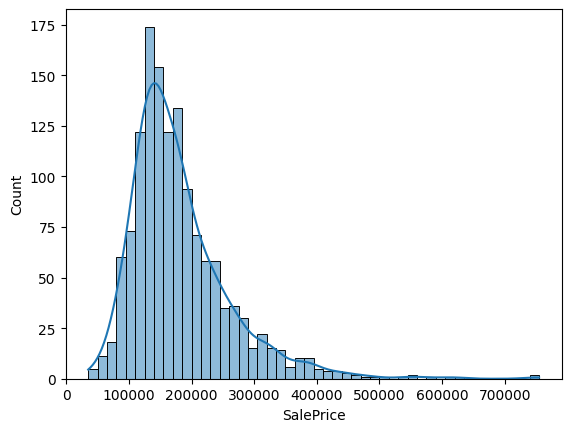

In [15]:
# Plot the distribution of the SalePrice
sns.histplot(housing_data['SalePrice'], kde=True)


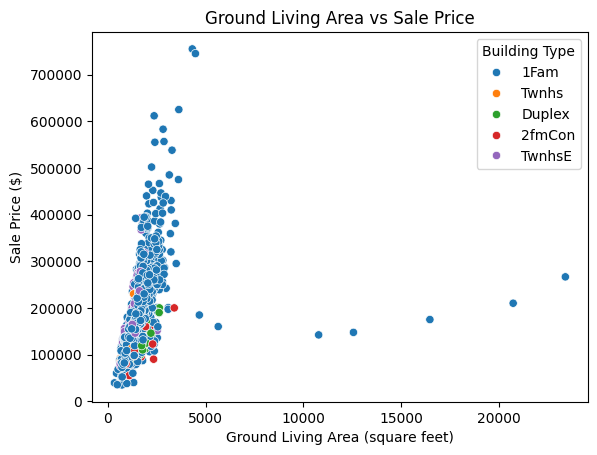

In [16]:
# Create a scatter plot to visualize the relationship between `SalePrice` and `GrLivArea` with hue based on building type.
sns.scatterplot(data=housing_data, x='GrLivArea', y='SalePrice', hue='BldgType')

plt.title('Ground Living Area vs Sale Price')
plt.xlabel('Ground Living Area (square feet)')
plt.ylabel('Sale Price ($)')
plt.legend(title='Building Type')

In the scatterplot, we notice a few strong outliers where homes have an unusually large ground living area, but the sale price doesn’t increase accordingly. Since most data points form a clear trend (as seen by the cloud of points), these outliers will be removed to avoid distorting the model.

In [17]:
# Remove outliers in the `GrLivArea` column
housing_data = housing_data[housing_data['GrLivArea'] < 4500]

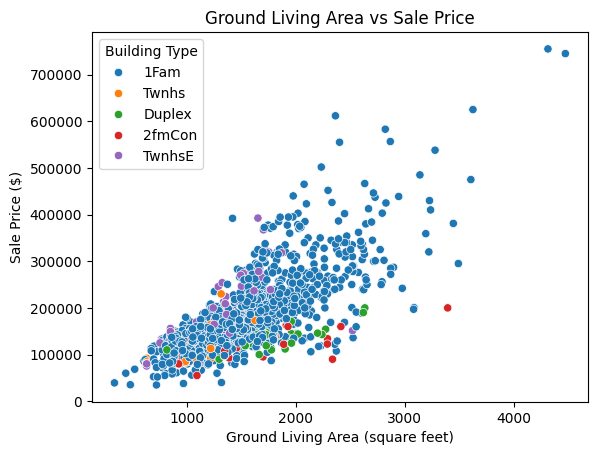

In [18]:
sns.scatterplot(data=housing_data, x='GrLivArea', y='SalePrice', hue='BldgType')

plt.title('Ground Living Area vs Sale Price')
plt.xlabel('Ground Living Area (square feet)')
plt.ylabel('Sale Price ($)')
plt.legend(title='Building Type')

After removing the outliers, the scatter plot of Ground Living Area versus Sale Price shows clear signs of heteroskedasticity, with larger homes exhibiting greater variability in Sale Price. This violates the constant variance assumption (from the gauss-markov classical assumptions) required by ordinary least squares (OLS) regression. To address this issue and stabilize variance, a log transformation of the `SalePrice` variable will be applied.

([0, 1, 2, 3, 4],
 [Text(0, 0, '1Fam'),
  Text(1, 0, 'Twnhs'),
  Text(2, 0, 'Duplex'),
  Text(3, 0, '2fmCon'),
  Text(4, 0, 'TwnhsE')])

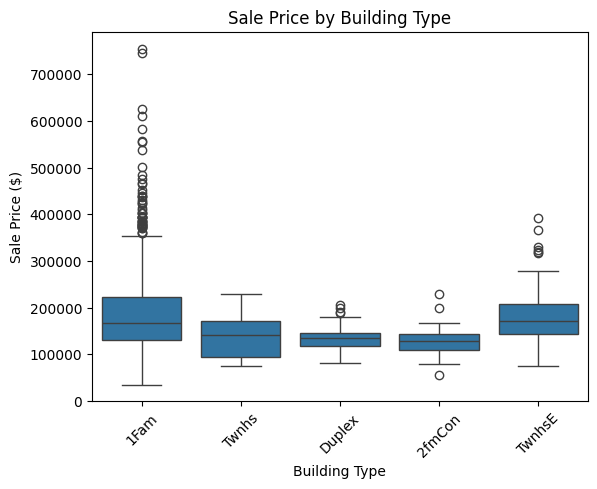

In [19]:
# Plot a boxplot to visualize the distribution of `SalePrice` across different `BldgType` categories.
sns.boxplot(data=housing_data, x='BldgType', y='SalePrice')
plt.title('Sale Price by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Sale Price ($)')
plt.xticks(rotation=45)

The distribution of `SalePrice` for Single-Family homes shows significant outliers. As high-end properties are a legitimate part of the housing market, these values will be kept. This is more reason to log transform `SalePrice` in order to reduce skewness and improve model performance.

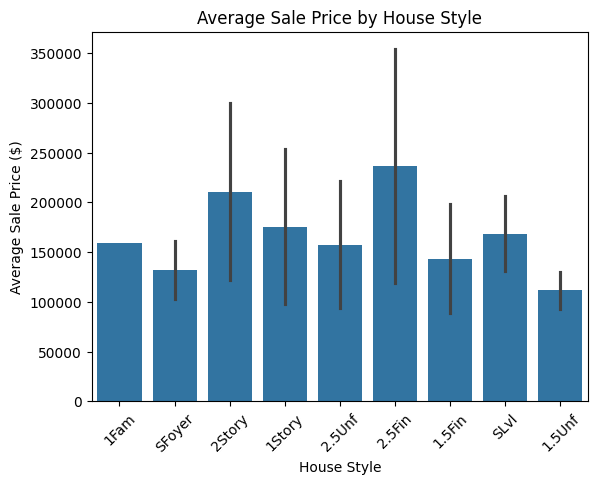

In [20]:
# Plot a bar chart of the average `SalePrice` for each `HouseStyle` category.
sns.barplot(data=housing_data, x='HouseStyle', y='SalePrice', estimator=np.mean, errorbar='sd')
plt.xticks(rotation=45)
plt.title('Average Sale Price by House Style')
plt.xlabel('House Style')
plt.ylabel('Average Sale Price ($)')
plt.show()

Whoa! 1Fam in `HouseStyle` has no standard Deviation! Lets look into this!

In [21]:
# Show data for House style 1fam
housing_data[housing_data['HouseStyle'] == '1Fam'].head()

,LotArea,GrLivArea,Street,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,Foundation,...,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice,HasBasement,HasAlley,HasGarage
0,8910,1194,Pave,Corner,1Fam,1Fam,6,6,1959,CBlock,...,BuiltIn,2,539,2006,WD,Normal,159500,1,0,1


<Axes: xlabel='HouseStyle', ylabel='count'>

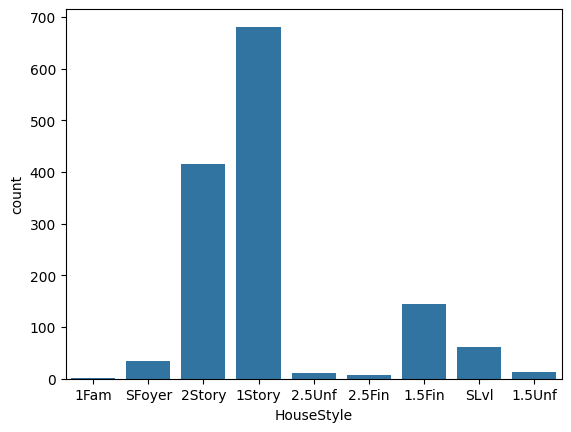

In [22]:
# Plot counts of each `HouseStyle` category.
sns.countplot(data=housing_data, x='HouseStyle')

We can see why the 1Fam household didnt have any variance... theres only one observation!

In [23]:
# Combine rare HouseStyle categories into "Other"
rare_styles = ['1Fam', 'SFoyer', '2.5Unf', '2.5Fin', '1.5Unf', 'SLvl']
housing_data['HouseStyle'] = housing_data['HouseStyle'].replace(rare_styles, 'Other')

<Axes: xlabel='HouseStyle', ylabel='count'>

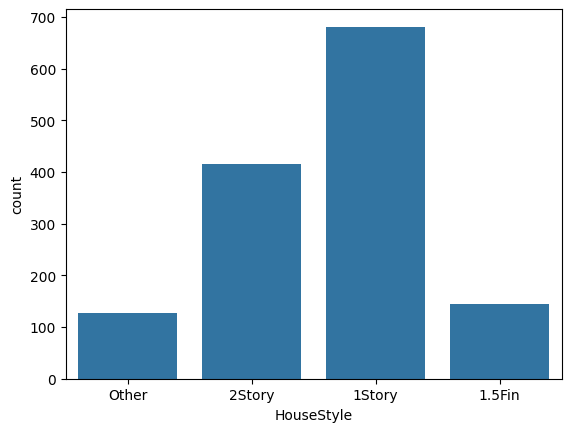

In [24]:
sns.countplot(data=housing_data, x='HouseStyle')

Due to significant class imbalance in the `HouseStyle` feature, rare categories with very low counts were grouped into a new category labeled "Other" to reduce noise and improve model performance.

Text(0, 0.5, 'Count')

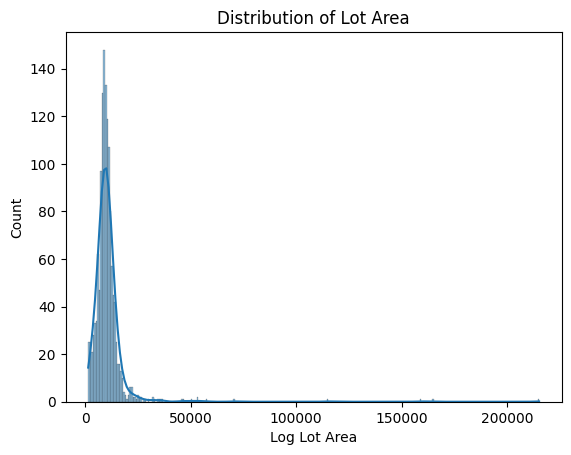

In [25]:
# Plot distribution of lot area
sns.histplot(housing_data['LotArea'], kde=True)
plt.title('Distribution of Lot Area')
plt.xlabel('Log Lot Area')
plt.ylabel('Count')

The distribution of `LotArea` is heavily right-skewed, with a small number of properties having very large lot sizes. To reduce skewness and limit the impact of extreme values, a log transformation will be applied to `LotArea`.


In [26]:
# Log transform the `LotArea` variable to reduce skewness.
housing_data['LotArea'] = np.log(housing_data['LotArea'])

Text(0, 0.5, 'Count')

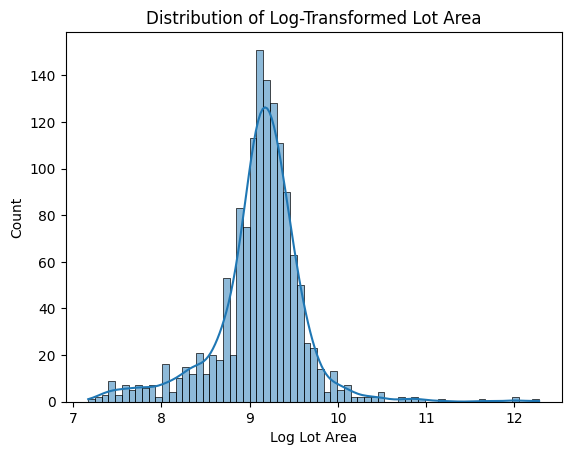

In [27]:
sns.histplot(housing_data['LotArea'], kde=True)
plt.title('Distribution of Log-Transformed Lot Area')
plt.xlabel('Log Lot Area')
plt.ylabel('Count')

Applying a log transformation to `LotArea` resulted in a distribution that is approximately normal. This transformation helps satisfy the assumptions of linear regression, reduces the influence of extreme values, and is expected to improve model performance and stability.


<Axes: xlabel='GrLivArea', ylabel='Count'>

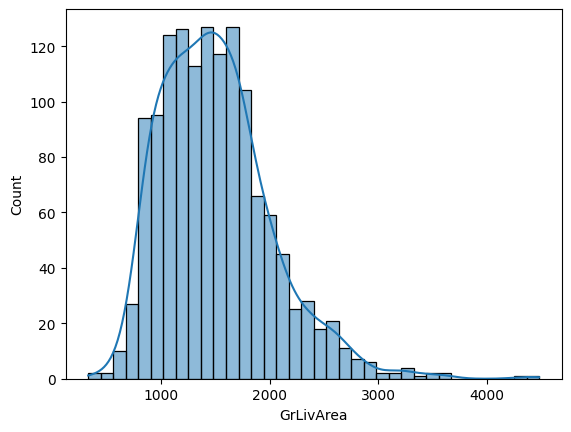

In [28]:
# Plot distribution of Ground Living Area
sns.histplot(housing_data['GrLivArea'], kde=True)

The distribution of `GrLivArea` is slightly right-skewed but remains relatively close to normal. Given the minor skewness, a log transformation seems unnecessary at this stage. The variable will be retained in its original scale.

In [29]:
housing_data['LogSalePrice'] = np.log1p(housing_data['SalePrice'])
#housing_data = housing_data.drop(columns=['SalePrice'])

<Axes: xlabel='LogSalePrice', ylabel='Count'>

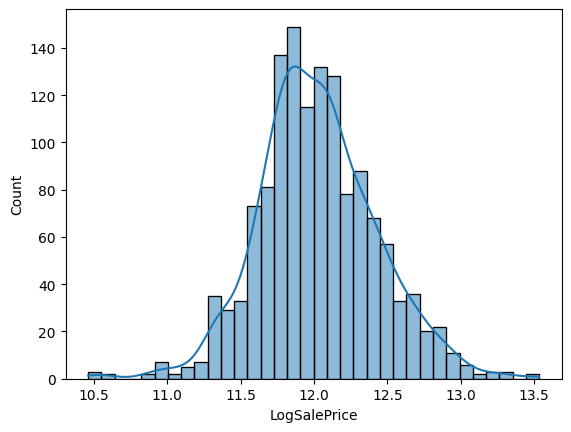

In [30]:
# Plot distribution of Log Sale Price
sns.histplot(housing_data['LogSalePrice'], kde=True)

Log transformations were selectively applied only to variables exhibiting significant skewness (e.g., `SalePrice`, `LotArea`). Variables that were already close to normally distributed (e.g., `GrLivArea`) were left in their original scale. To ensure that differences in variable magnitudes do not disproportionately affect model training. Note that feature standardization will be applied prior to modeling.


<Axes: xlabel='Street', ylabel='count'>

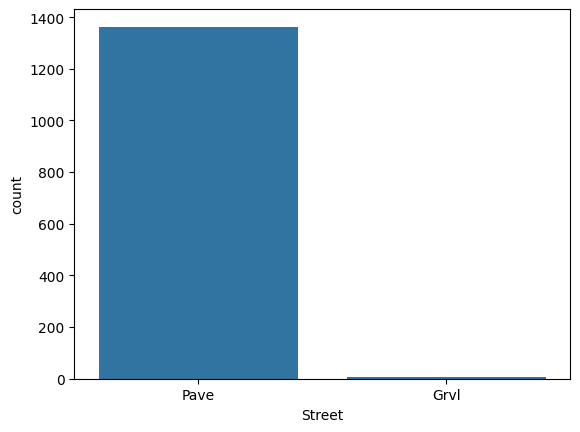

In [31]:
# Plot count of each Street type
sns.countplot(data=housing_data, x='Street')

In [32]:
# Check percent of data with paved compared to Gravel in street
housing_data['Street'].value_counts(normalize=True) * 100

Street
Pave    99.561724
Grvl     0.438276
Name: proportion, dtype: float64

The `Street` feature is heavily imbalanced, with almost all properties located on paved roads. Given the lack of variability, this feature provides minimal predictive power and will therefore be dropped from the dataset. An alternative approach could be to drop all gravel road properties, however, I have chosen to drop the entire feature instead. Since gravel road properties represent a very small fraction of the dataset, either approach would have minimal impact on the model's overall performance.

In [33]:
# Drop the `Street` column as it is not useful for the model.
housing_data = housing_data.drop(columns=['Street'])

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Corner'),
  Text(1, 0, 'Inside'),
  Text(2, 0, 'CulDSac'),
  Text(3, 0, 'FR2'),
  Text(4, 0, 'FR3')])

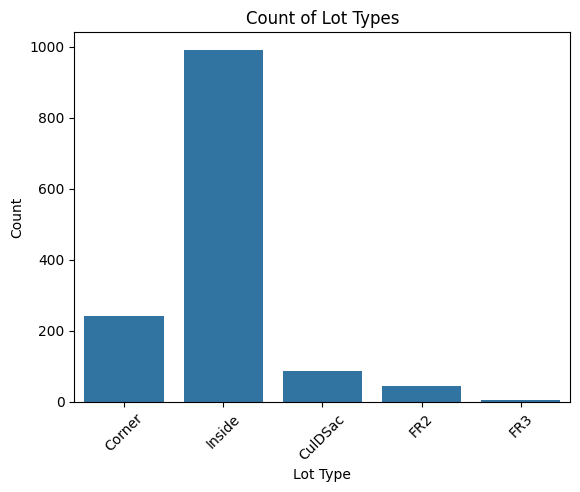

In [34]:
# Plot a countplot of the `LotType` variable.
sns.countplot(data=housing_data, x='LotType')
plt.title('Count of Lot Types')
plt.xlabel('Lot Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

In [35]:
# Check the percent of data with each LotType
housing_data['LotType'].value_counts(normalize=True) * 100

LotType
Inside     72.388605
Corner     17.677137
CulDSac     6.355004
FR2         3.287071
FR3         0.292184
Name: proportion, dtype: float64

In [36]:
# Group rare LotType categories into 'Other'
rare_lottypes = ['CulDSac', 'FR2', 'FR3']
housing_data['LotType'] = housing_data['LotType'].replace(rare_lottypes, 'Other')


([0, 1, 2], [Text(0, 0, 'Corner'), Text(1, 0, 'Inside'), Text(2, 0, 'Other')])

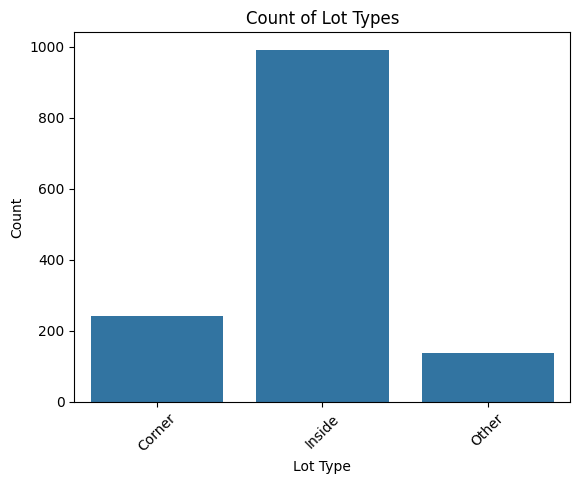

In [37]:
sns.countplot(data=housing_data, x='LotType')
plt.title('Count of Lot Types')
plt.xlabel('Lot Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

I found that the `LotType` feature is heavily dominated by 'Inside' lots (72%) and 'Corner' lots (18%), while 'CulDSac', 'FR2', and 'FR3' lots are much more rare, collectively representing less than 10% of the data. To simplify the feature and reduce sparsity during modeling, these rare lot types were grouped into a new 'Other' category. This grouping helps prevent the model from overfitting to small, underrepresented categories.

<Axes: xlabel='BldgType', ylabel='count'>

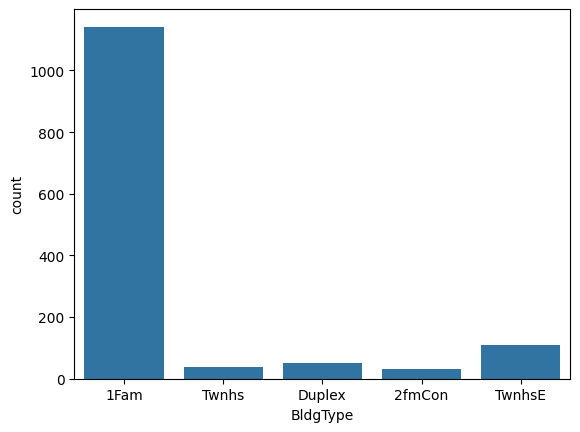

In [38]:
# Plot a countplot of the building type variable.
sns.countplot(data=housing_data, x='BldgType')

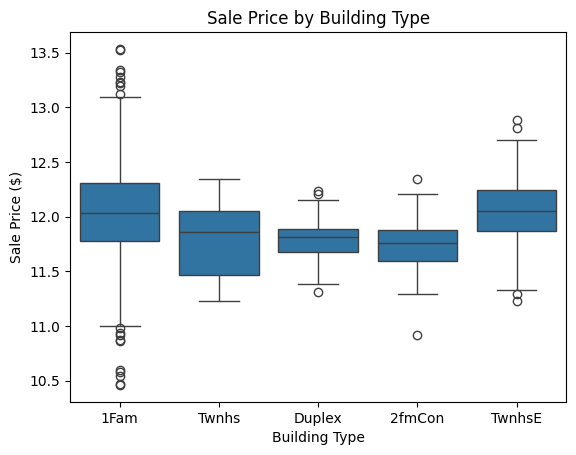

In [39]:
sns.boxplot(data=housing_data, x='BldgType', y='LogSalePrice')
plt.title('Sale Price by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Sale Price ($)')
plt.show()


Although the median SalePrice across different building types is relatively similar, the variability and presence of high-value outliers differ substantially, particularly for single-family homes (`1Fam`). These differences provide important predictive information. Therefore, I will keep `BldgType` feature for modeling.

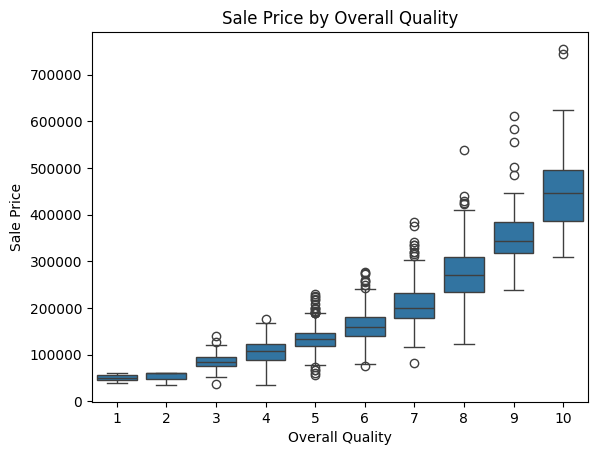

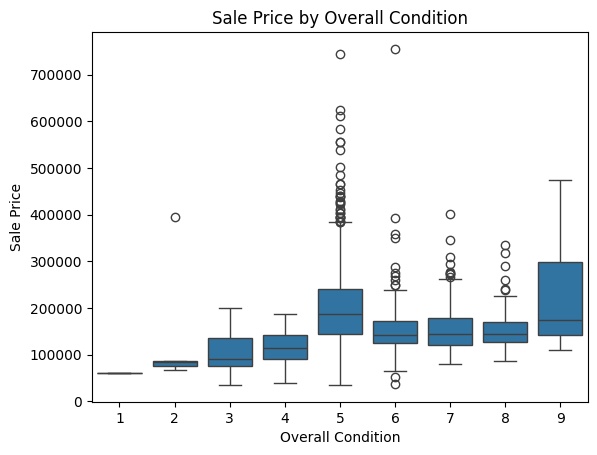

In [40]:
# Plot a boxplot of Overall Quality
sns.boxplot(data=housing_data, x='OverallQuality', y='SalePrice')
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

# Overall Condition
sns.boxplot(data=housing_data, x='OverallCondition', y='SalePrice')
plt.title('Sale Price by Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.show()

<Axes: xlabel='OverallQuality', ylabel='count'>

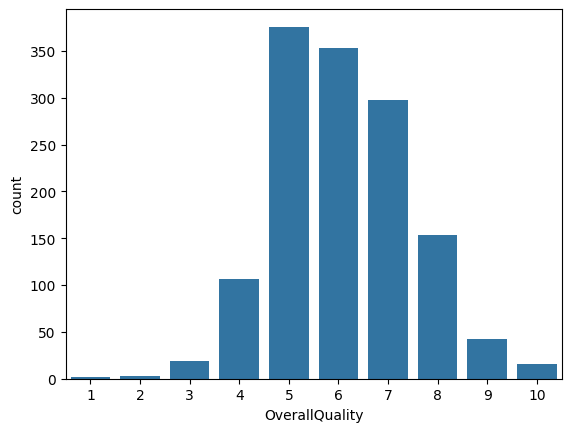

In [41]:
# Plot a countplot of the Overall Quality variable.
sns.countplot(data=housing_data, x='OverallQuality')

<Axes: xlabel='OverallCondition', ylabel='count'>

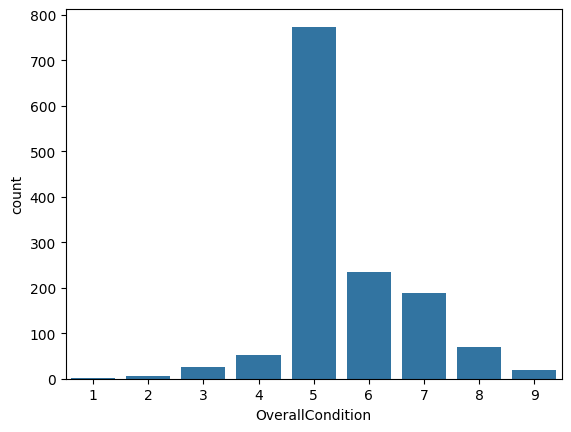

In [42]:
# Plot a countplot of the Overall Condition variable.
sns.countplot(data=housing_data, x='OverallCondition')

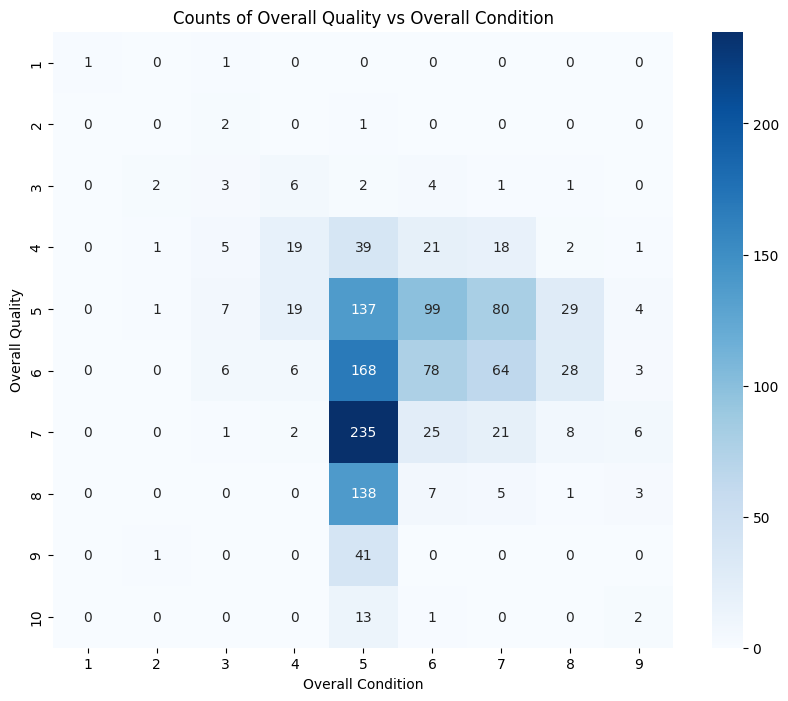

In [43]:
# Create a cross-tabulation (counts of each combination)
condition_quality_crosstab = pd.crosstab(housing_data['OverallQuality'], housing_data['OverallCondition'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(condition_quality_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Counts of Overall Quality vs Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Overall Quality')
plt.show()

The count plots and heatmap of `OverallQuality` versus `OverallCondition` show that homes with low quality and high condition (and vice versa) are extremely rare. Most properties cluster around average to slightly above-average ratings (5–7) for both quality and condition. This indicates that `OverallQuality` and `OverallCondition` are positively correlated and share a similar central tendency in their distributions. The boxplot of `OverallQuality` showed a strong correlation with `SalePrice`, whereas `OverallCondition` did not. Based on this, `OverallQuality` is expected to be the more influential predictor of `SalePrice`.


In [44]:
# Calculate the Pearson correlation between OverallQuality and OverallCondition
correlation = housing_data['OverallQuality'].corr(housing_data['OverallCondition'])

print(f"Correlation between OverallQuality and OverallCondition: {correlation:.3f}")


Correlation between OverallQuality and OverallCondition: -0.092


Although the heatmap of `OverallQuality` and `OverallCondition` showed that both variables are concentrated around average values (5–7), the Pearson correlation coefficient between them was -0.092, indicating almost no linear relationship. Therefore, while the two variables are similarly centered, they vary independently. This suggests that each feature could provide distinct information for modeling SalePrice. I will keep Overall Condition for now and come back to it after viewing the feature importance.

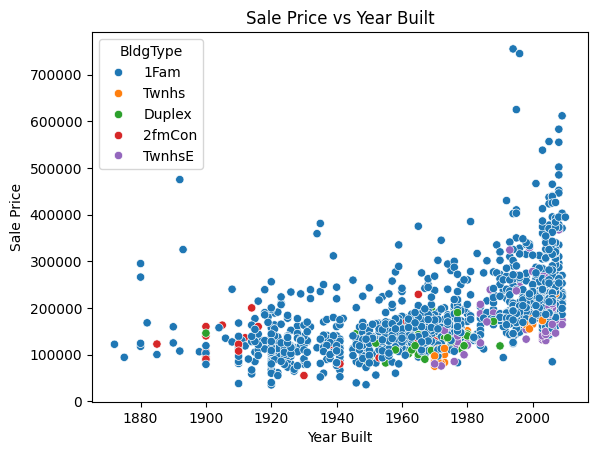

In [45]:
# Plot a scatter plot of SalesPrice vs YearBuilt
sns.scatterplot(data=housing_data, x='YearBuilt', y='SalePrice', hue='BldgType')
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

The scatterplot of `SalePrice` versus `YearBuilt` shows that more recently built homes tend to have higher sale prices, with the most expensive homes concentrated in the last few decades. Some heteroskedasticity is observed, with a wider spread of sale prices among newer homes. This suggests that `YearBuilt` is a strong predictor of SalePrice, and the previously applied log transformation to SalePrice will help mitigate the impact of heteroskedasticity.

Text(0, 0.5, 'Count')

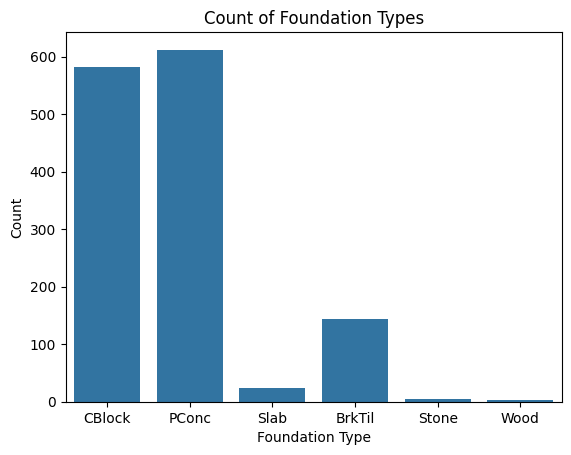

In [46]:
# Count plot of the Foundation variable
sns.countplot(data=housing_data, x='Foundation')
plt.title('Count of Foundation Types')
plt.xlabel('Foundation Type')
plt.ylabel('Count')

In [47]:
# Check the percent of data with each Foundation type
housing_data['Foundation'].value_counts(normalize=True) * 100

Foundation
PConc     44.704164
CBlock    42.512783
BrkTil    10.518627
Slab       1.680058
Stone      0.365230
Wood       0.219138
Name: proportion, dtype: float64

In [48]:
# Group rare LotType categories into 'Other'
rare_foundations = ['Slab', 'Stone', 'Wood']
housing_data['Foundation'] = housing_data['Foundation'].replace(rare_foundations, 'Other')

Text(0, 0.5, 'Count')

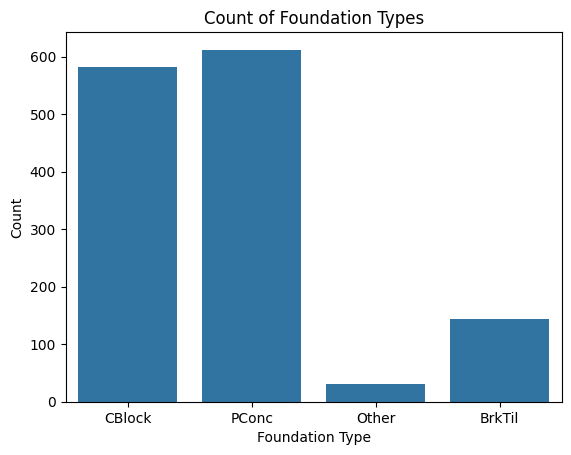

In [49]:
# Count plot of the Foundation variable
sns.countplot(data=housing_data, x='Foundation')
plt.title('Count of Foundation Types')
plt.xlabel('Foundation Type')
plt.ylabel('Count')

I found that the `Foundation` feature is heavily dominated by 'PConc'(Poured Concrete) (45%) and 'CBlock'(Cinder Block) (43%), with 'BrkTil'(Brick and Tile) representing about 10% of the observations. Foundation types such as 'Slab', 'Stone', and 'Wood' are extremely rare, collectively accounting for less than 3% of the data. To simplify the feature and reduce sparsity during modeling, these rare types were grouped into a new 'Other' category.


Text(0, 0.5, 'Sale Price')

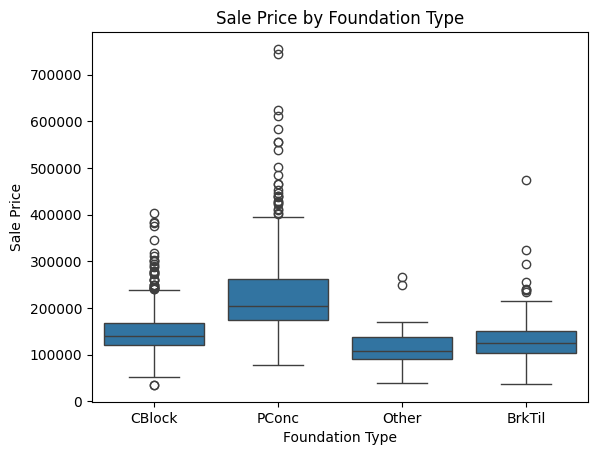

In [50]:
# Plot a boxplot of SalePrice by Foundation type
sns.boxplot(data=housing_data, x='Foundation', y='SalePrice')
plt.title('Sale Price by Foundation Type')
plt.xlabel('Foundation Type')
plt.ylabel('Sale Price')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

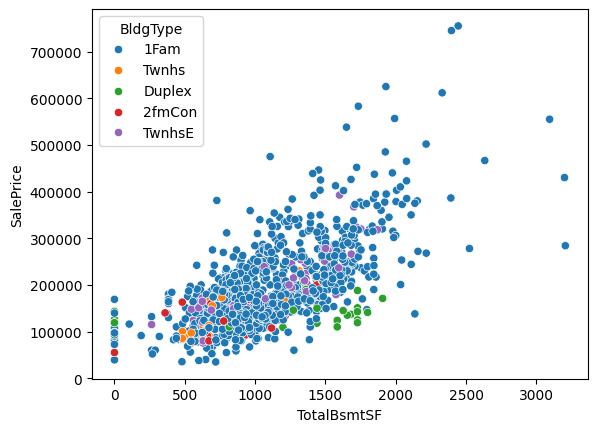

In [51]:
# Plot a scatter plot of SalePrice vs Basement area
sns.scatterplot(data=housing_data, x='TotalBsmtSF', y='SalePrice', hue='BldgType')

The scatterplot of `TotalBsmtSF` versus `SalePrice` shows a clear positive relationship, with larger basement areas associated with higher sale prices. This was expected, as homes with larger basements typically have greater total living space, and square footage is known to be highly correlated with SalePrice. `TotalBsmtSF` will therefore be retained as an important predictor in the modeling process.

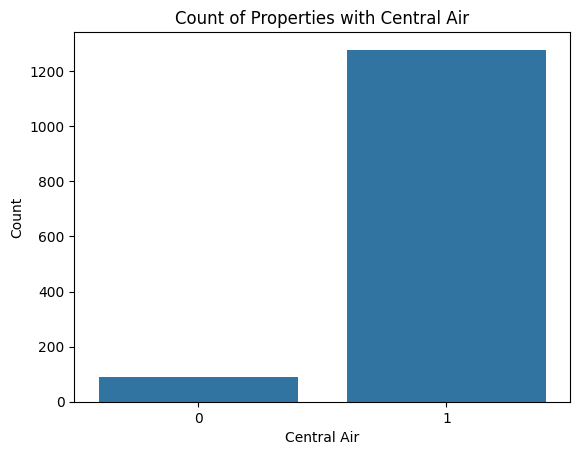

In [52]:
# Plot a countplot of wheter a property has Central Air system 
sns.countplot(data=housing_data, x='CentralAir')
plt.title('Count of Properties with Central Air')
plt.xlabel('Central Air')
plt.ylabel('Count')
plt.show()


Text(0, 0.5, 'Sale Price')

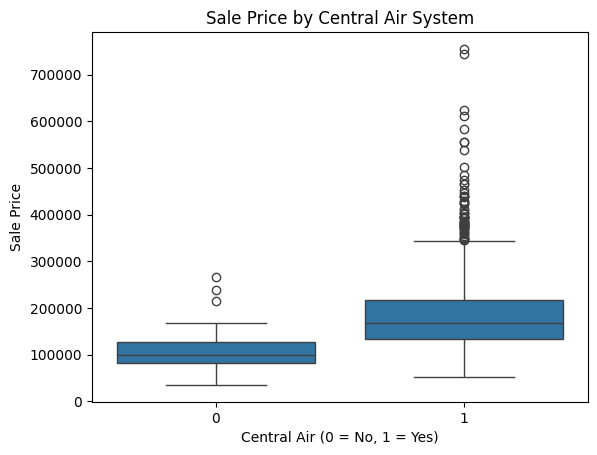

In [53]:
# Plot a boxplot of SalePrice vs Central Air
sns.boxplot(data=housing_data, x='CentralAir', y='SalePrice')
plt.title('Sale Price by Central Air System')
plt.xlabel('Central Air (0 = No, 1 = Yes)')
plt.ylabel('Sale Price')

In [54]:
# Calculate the percent of data with Central Air
housing_data['CentralAir'].value_counts(normalize=True) * 100

CentralAir
1    93.352812
0     6.647188
Name: proportion, dtype: float64

The `CentralAir` feature is heavily imbalanced, with approximately 93% of properties equipped with a central air system. Despite the imbalance, homes with central air systems tend to have higher sale prices on average, confirming my pre concieved knowledge expectations. Given its clear relationship with `SalePrice`, `CentralAir` will be retained as a predictive feature.

Text(0, 0.5, 'Sale Price')

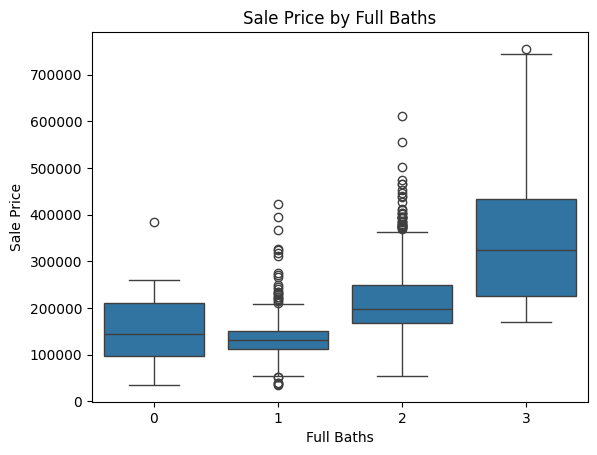

In [55]:
# Plot a boxplot of SalePrice vs Full baths
sns.boxplot(data=housing_data, x='FullBath', y='SalePrice')
plt.title('Sale Price by Full Baths')
plt.xlabel('Full Baths')
plt.ylabel('Sale Price')


Text(0, 0.5, 'Sale Price')

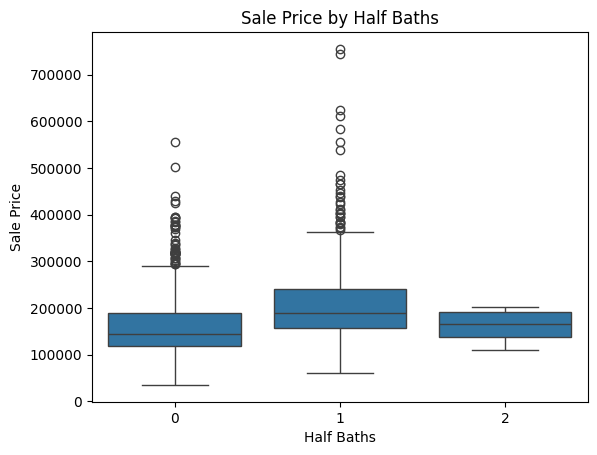

In [56]:
# plot a boxplot of SalePrice vs Half baths
sns.boxplot(data=housing_data, x='HalfBath', y='SalePrice')
plt.title('Sale Price by Half Baths')
plt.xlabel('Half Baths')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Count')

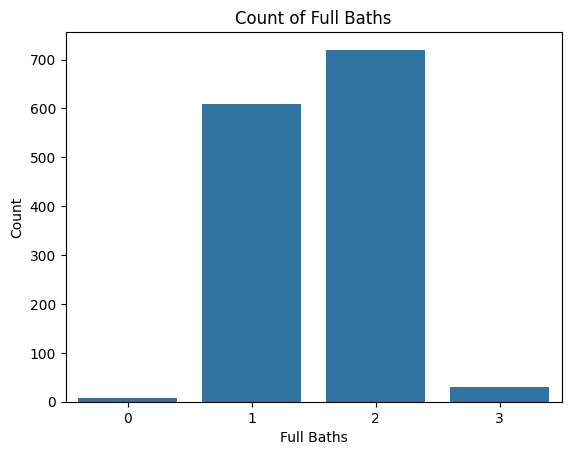

In [57]:
# Plot a countplot of the FullBath variable.
sns.countplot(data=housing_data, x='FullBath')
plt.title('Count of Full Baths')
plt.xlabel('Full Baths')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

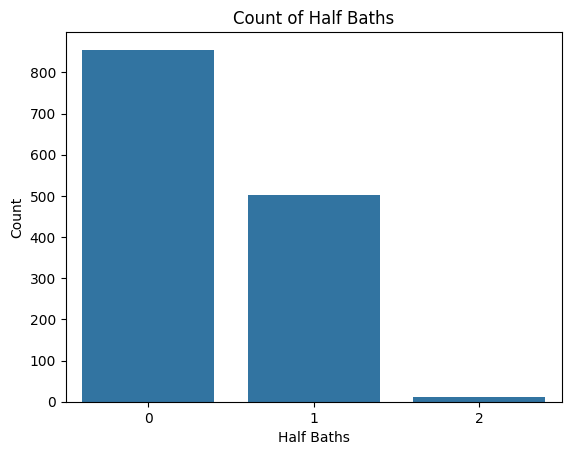

In [58]:
# Plot a countplot of the HalfBath variable.
sns.countplot(data=housing_data, x='HalfBath')
plt.title('Count of Half Baths')
plt.xlabel('Half Baths')
plt.ylabel('Count')


In [59]:
housing_data['TotalBaths'] = housing_data['FullBath'] + 0.5 * housing_data['HalfBath']

Text(0, 0.5, 'Sale Price')

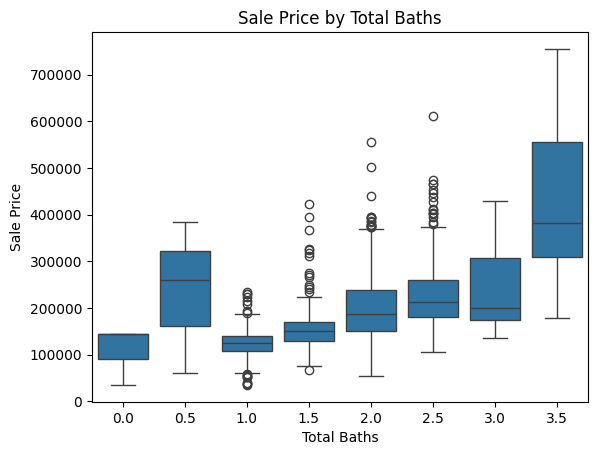

In [60]:
# Plot a boxplot of SalePrice vs Total Baths
sns.boxplot(data=housing_data, x='TotalBaths', y='SalePrice')
plt.title('Sale Price by Total Baths')
plt.xlabel('Total Baths')
plt.ylabel('Sale Price')


Text(0, 0.5, 'Count')

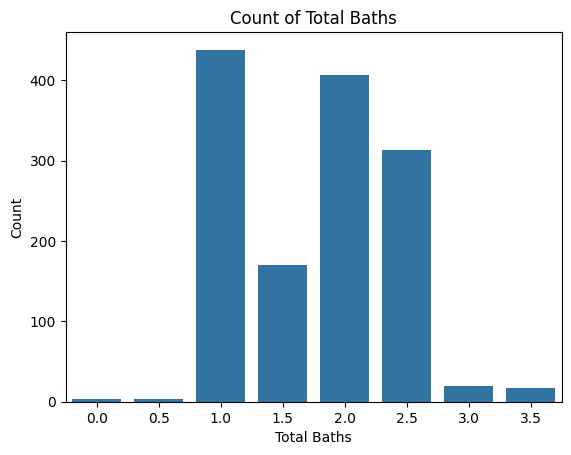

In [61]:
# Plot a countplot of the TotalBaths variable.
sns.countplot(data=housing_data, x='TotalBaths')
plt.title('Count of Total Baths')
plt.xlabel('Total Baths')
plt.ylabel('Count')

The number of full bathrooms shows a strong positive relationship with SalePrice, as expected, while the number of half bathrooms shows a weaker and less consistent effect. Most homes in the dataset have 1–2 full baths and 0–1 half baths. To better capture the overall bathroom count, Ive created a new feature `TotalBaths` by summing full baths and half baths, weighting half baths at 0.5.

Text(0, 0.5, 'Count')

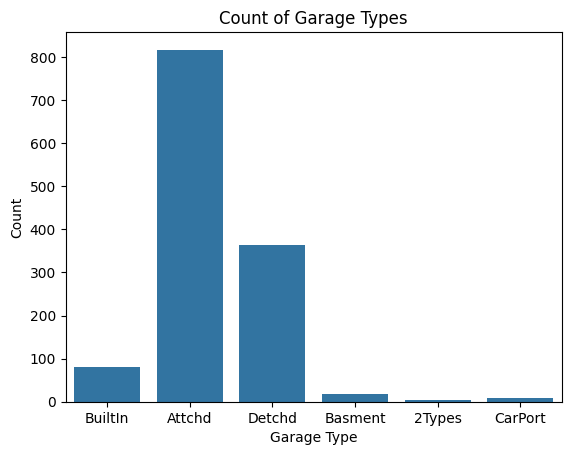

In [62]:
# Plot a countplot of the Garage Type variable.
sns.countplot(data=housing_data, x='GarageType')
plt.title('Count of Garage Types')
plt.xlabel('Garage Type')
plt.ylabel('Count')

In [63]:
# Check the percent of data with each Garage type
housing_data['GarageType'].value_counts(normalize=True) * 100

GarageType
Attchd     63.186388
Detchd     28.074246
BuiltIn     6.264501
Basment     1.392111
CarPort     0.696056
2Types      0.386698
Name: proportion, dtype: float64

Text(0, 0.5, 'Sale Price')

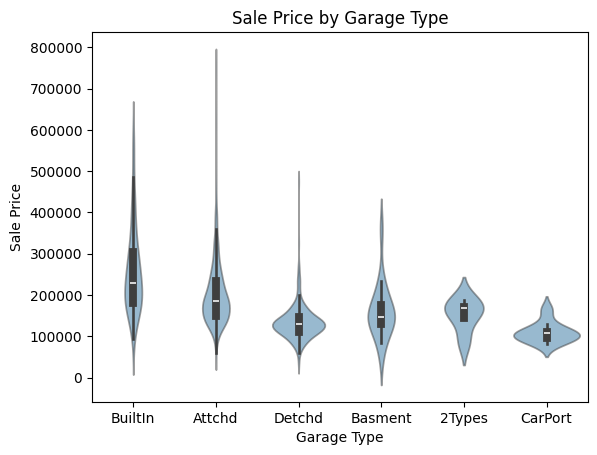

In [64]:
# Plot a violin plot of SalePrice vs Garage Type
sns.violinplot(data=housing_data, x='GarageType', y='SalePrice', alpha=0.5)
plt.title('Sale Price by Garage Type')
plt.xlabel('Garage Type')
plt.ylabel('Sale Price')

In [65]:
# Group rare GarageType categories with similar averages into 'Other'
rare_garages = ['Basment', 'CarPort', '2Types']
housing_data['GarageType'] = housing_data['GarageType'].replace(rare_garages, 'Other')

The `GarageType` feature was mainly 'Attchd' garages, with 'Detchd' and 'BuiltIn' garages also fairly common. 'Basment', '2Types', and 'CarPort' were rare and likely subject to small sample size effects, resulting in concentrated distributions. To simplify the feature and reduce noise, rare categories were grouped into a new 'Other' category, while 'Attchd', 'Detchd', and 'BuiltIn' were retained separately due to their meaningful relationship with SalePrice.


Text(0, 0.5, 'Sale Price')

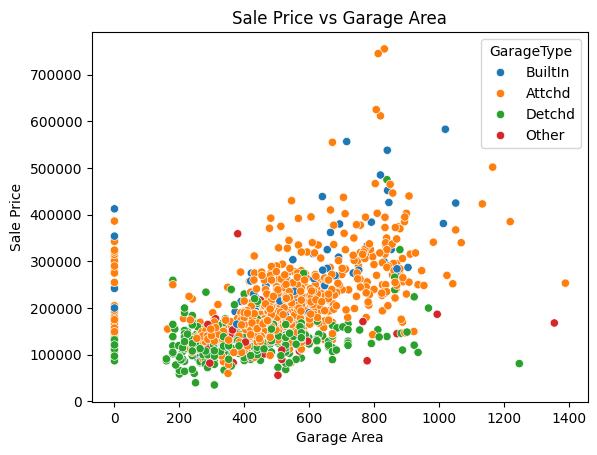

In [66]:
# PLot a scatter plot of SalePrice vs Garage Area
sns.scatterplot(data=housing_data, x='GarageArea', y='SalePrice', hue='GarageType')
plt.title('Sale Price vs Garage Area')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')

In [67]:
# Fix GarageType where GarageArea is 0
housing_data.loc[housing_data['GarageArea'] == 0, 'GarageType'] = 'None'

In [68]:
# Check the percent of data with each Garage type
housing_data['GarageType'].value_counts(normalize=True) * 100

GarageType
Attchd     57.779401
Detchd     25.639153
None        8.692476
BuiltIn     5.551497
Other       2.337473
Name: proportion, dtype: float64

Hang on! Some homes with 0 garage area still have a garage type, this must be a mistake. These entries were corrected by setting `GarageType` to 'None' wherever `GarageArea` was zero to ensure data consistency.

Among homes that do have garages, there is a strong positive relationship between `GarageArea` and `SalePrice`: as garage area increases, sale price also tends to increase. This is likely because larger homes generally come with larger garages, and overall home size is known to be highly correlated with sale price.

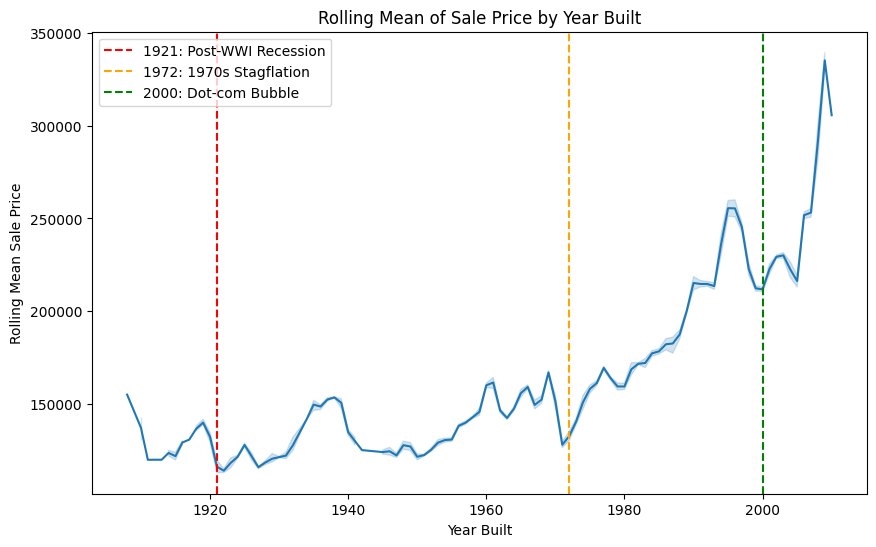

In [69]:
# Plot a rolling mean of SalePrice by YearBuilt
housing_data = housing_data.sort_values('YearBuilt')

# Calculate a rolling mean of SalePrice over YearBuilt
housing_data['SalePrice_RollingMean'] = housing_data['SalePrice'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=housing_data, x='YearBuilt', y='SalePrice_RollingMean')
plt.xlabel('Year Built')
plt.ylabel('Rolling Mean Sale Price')
plt.title('Rolling Mean of Sale Price by Year Built')

plt.axvline(x=1921, color='red', linestyle='--', label='1921: Post-WWI Recession')
plt.axvline(x=1972, color='orange', linestyle='--', label='1972: 1970s Stagflation')
plt.axvline(x=2000, color='green', linestyle='--', label='2000: Dot-com Bubble')

plt.legend()

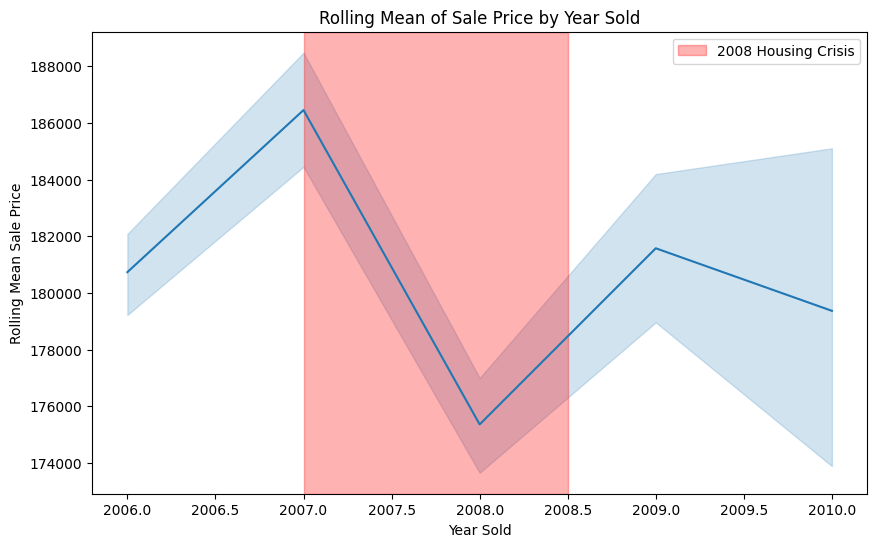

In [70]:
# Plot a rolling mean of SalePrice by YearBuilt
housing_data = housing_data.sort_values('YearSold')

# Calculate a rolling mean of SalePrice over YearSold
housing_data['SalePrice_RollingMean_Sold'] = housing_data['SalePrice'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=housing_data, x='YearSold', y='SalePrice_RollingMean_Sold')
plt.xlabel('Year Sold')
plt.ylabel('Rolling Mean Sale Price')
plt.title('Rolling Mean of Sale Price by Year Sold')

plt.axvspan(2007, 2008.5, color='red', alpha=0.3, label='2008 Housing Crisis')

plt.legend()


In [71]:
# check max of year sold and year built
print(housing_data['YearSold'].max())
print(housing_data['YearBuilt'].max())

2010
2010


In the rolling mean of SalePrice by YearBuilt, notable dips are observed around 1921, 1972, and 2000. These do not perfectly align with textbook economic crash dates but are consistent with periods of real economic slowdown or market shifts: the post-World War I recession around 1921, the stagflation period preceding the 1973 oil crisis, and the dot-com bubble burst around 2000. Given the smoothing effect of the rolling mean and the use of YearBuilt rather than YearSold, slight shifts in timing are expected.

When examining the rolling mean of SalePrice by YearSold, a sharp decline is observed between 2007 and 2008.5, corresponding directly to the 2008 housing crisis. This sharp drop highlights the impact of the financial crisis on home sale prices more clearly, as YearSold captures the actual timing of market effects rather than when the properties were built.

Since the dataset covers home sales between 2006 and 2010, it captures a period of the real estate market that includes both the peak of the housing bubble and the subsequent financial crisis. As a result, SalePrices may reflect unusual market dynamics, with inflated values before 2008 and depressed values afterward.



<Axes: xlabel='YearBuilt', ylabel='Count'>

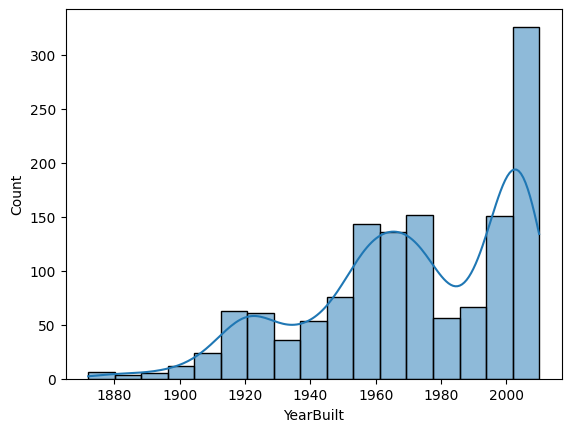

In [72]:
# Plot a histogram of year built
sns.histplot(housing_data['YearBuilt'], kde=True)

Although the `YearBuilt` feature is slightly left skewed, no transformation will be applied. This is because `YearBuilt` is a temporal feature where the absolute value carries meaningful information (i.e. newer homes generally have higher sale prices). Applying transformations like log or square root may distort the time-based interpretation of the variable, which is crucial for modeling housing prices.


Text(0, 0.5, 'Sale Price')

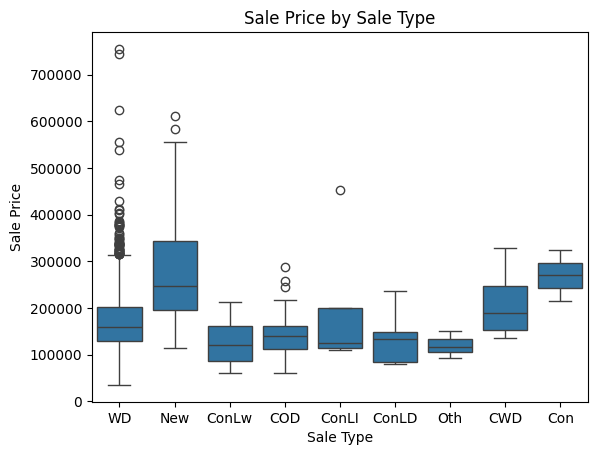

In [73]:
# Plot a boxplot of SalePrice vs SaleType
sns.boxplot(data=housing_data, x='SaleType', y='SalePrice')
plt.title('Sale Price by Sale Type')
plt.xlabel('Sale Type')
plt.ylabel('Sale Price')


In [74]:
# Check the percent of data with each SaleType
housing_data['SaleType'].value_counts(normalize=True) * 100

SaleType
WD       86.632579
New       8.327246
COD       3.140979
ConLD     0.584368
ConLI     0.365230
ConLw     0.292184
CWD       0.292184
Oth       0.219138
Con       0.146092
Name: proportion, dtype: float64

In [75]:
# Group rare SaleType categories into 'Other'
rare_saletype = ['COD', 'ConLI', 'ConLw', 'ConLD', 'CWD', 'Oth']
housing_data['SaleType'] = housing_data['SaleType'].replace(rare_saletype, 'Other')


housing_data['SaleType'] = housing_data['SaleType'].replace({'Con': 'WD'})


In [76]:
housing_data['SaleType'].value_counts(normalize=True) * 100

SaleType
WD       86.778671
New       8.327246
Other     4.894083
Name: proportion, dtype: float64

Text(0, 0.5, 'Sale Price')

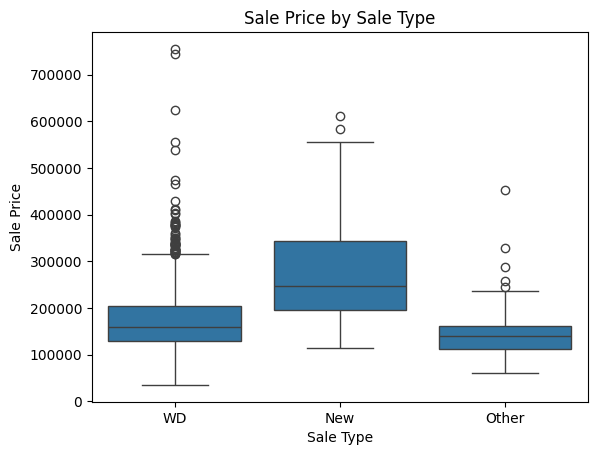

In [77]:
sns.boxplot(data=housing_data, x='SaleType', y='SalePrice')
plt.title('Sale Price by Sale Type')
plt.xlabel('Sale Type')
plt.ylabel('Sale Price')

In [78]:
housing_data['IsNew'] = (housing_data['SaleType'] == 'New').astype(int)
housing_data = housing_data.drop(columns=['SaleType'])

Text(0, 0.5, 'Sale Price')

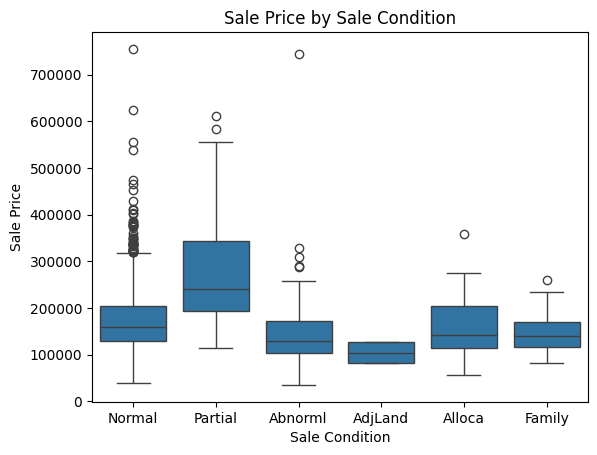

In [79]:
# Plot a boxplot of SalePrice vs SaleCondition
sns.boxplot(data=housing_data, x='SaleCondition', y='SalePrice')
plt.title('Sale Price by Sale Condition')
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')


In [80]:
# check the percent of data with each SaleCondition
housing_data['SaleCondition'].value_counts(normalize=True) * 100


SaleCondition
Normal     81.811541
Partial     8.546384
Abnorml     7.085464
Family      1.460920
Alloca      0.803506
AdjLand     0.292184
Name: proportion, dtype: float64

In [81]:
pd.crosstab(housing_data['IsNew'], housing_data['SaleCondition'])

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
IsNew,,,,,,
0,97,4,11,20,1120,3
1,0,0,0,0,0,114


In [82]:
# Drop the `SaleCondition` column as it does not capture any useful information for the model that isnt captured by the `IsNew` column.
housing_data = housing_data.drop(columns=['SaleCondition'])

Cross-tabulation of `IsNew` and `SaleCondition` confirmed that nearly all new home sales (IsNew = 1) were associated with a 'Partial' SaleCondition. A small number of non-new homes (3 observations) were also labeled as 'Partial', potentially due to unusual sales circumstances or labeling misunputs. Given the strong overall alignment, `SaleCondition` is considered redundant with `IsNew` and was dropped from the dataset.

In [83]:
# Feature engineering: Create a new feature `TotalSF` as the sum of `TotalBsmtSF` and `GrLivArea`.
housing_data['TotalSF'] = housing_data['TotalBsmtSF'] + housing_data['GrLivArea']

# Drop the TotalBsmtSF and GrLivArea columns as they are no longer needed.
housing_data = housing_data.drop(columns=['TotalBsmtSF', 'GrLivArea'])


A new feature, `TotalSF`, was created by summing basement square footage (`TotalBsmtSF`) and above-ground living area (`GrLivArea`). Since `GrLivArea` already accounts for all finished levels in the house, no adjustments for HouseStyle were necessary. After creating this feature, the original `TotalBsmtSF` and `GrLivArea` columns were dropped to avoid redundancy.

In [84]:
# Feature engineering: Create a new feature `YearSold_squared`
housing_data['YearSold_squared'] = housing_data['YearSold'] ** 2

To capture potential nonlinear time effects, such as the impact of the 2008 housing crisis, a new feature `YearSold_squared` was created by squaring the `YearSold` variable. This allows the model to detect curved relationships between sale year and sale price, without relying on hard thresholds like a binary recession indicator.

In [85]:
housing_data

,LotArea,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,Foundation,CentralAir,FullBath,...,HasBasement,HasAlley,HasGarage,LogSalePrice,TotalBaths,SalePrice_RollingMean,SalePrice_RollingMean_Sold,IsNew,TotalSF,YearSold_squared
535,8.209308,Inside,TwnhsE,Other,5,5,2005,PConc,1,1,...,1,0,1,11.884496,1.0,213702.400000,NaN,0,1619,4024036
548,9.562053,Corner,1Fam,2Story,8,5,2005,PConc,1,3,...,1,0,1,12.692506,3.5,214985.733333,NaN,1,3534,4024036
831,9.087721,Inside,1Fam,2Story,6,5,2005,PConc,1,2,...,1,0,1,12.066241,2.5,212709.066667,NaN,1,2250,4024036
846,9.871894,Corner,1Fam,2Story,7,5,2005,PConc,1,2,...,1,0,0,12.676079,2.5,212445.733333,NaN,1,3854,4024036
855,9.995611,Inside,1Fam,2Story,5,5,2005,PConc,1,2,...,1,0,1,12.165985,2.5,206595.733333,NaN,0,2570,4024036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,9.082507,Corner,1Fam,1.5Fin,4,7,1910,BrkTil,1,1,...,1,1,0,11.477309,1.0,125044.200000,124858.1,0,1716,4040100
471,9.489032,Inside,1Fam,1Story,9,5,2008,PConc,1,2,...,1,0,1,12.843974,2.0,296254.866667,133208.1,0,4020,4040100
579,8.954157,Inside,1Fam,2Story,4,7,1910,CBlock,1,1,...,1,0,1,11.740069,1.0,156026.833333,133758.1,0,1985,4040100
1419,9.340842,Corner,1Fam,1Story,9,2,2010,PConc,1,1,...,1,0,1,12.885205,1.5,305568.533333,141372.5,1,3712,4040100


In [86]:
# Check correlation between YearSold_squared and SalePrice
correlation = housing_data['YearSold_squared'].corr(housing_data['SalePrice'])
print(f"Correlation between YearSold_squared and SalePrice: {correlation:.4f}")

Correlation between YearSold_squared and SalePrice: -0.0223


Correlation analysis reveals only a very weak relationship with SalePrice (correlation = -0.0223). However I will still keep it as model may benefit from the higher flexibility of the variable

In [87]:
# Drop columns: FullBath, HalfBath, SalePrice, SalePrice_RollingMean, SalePrice_RollingMean_Sold as they are not needed anymore.
housing_data = housing_data.drop(columns=['FullBath', 'HalfBath',  'SalePrice', 'SalePrice_RollingMean', 'SalePrice_RollingMean_Sold'])


Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

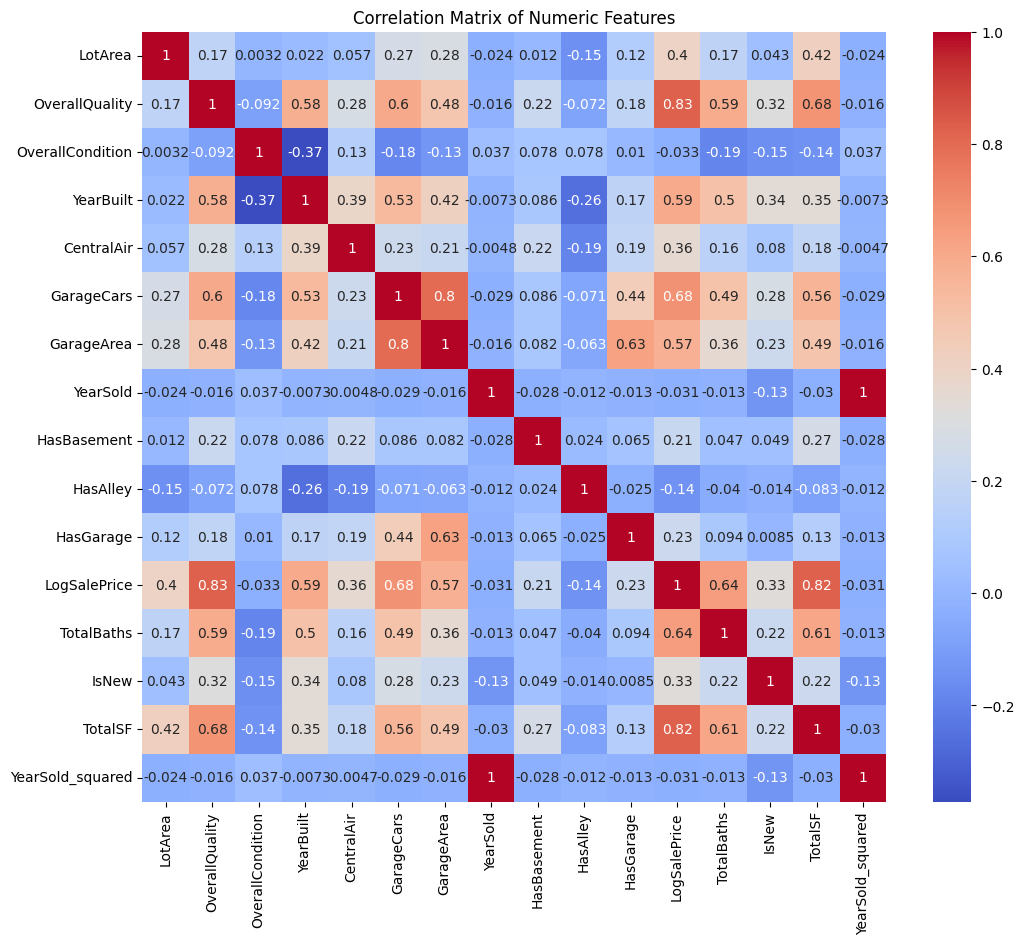

In [88]:
# Create a correlation matrix to visualize the relationships between numeric features
numeric_features = housing_data.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')

In [89]:
# Drop GarageArea
housing_data = housing_data.drop(columns=['GarageArea'])

After plotting the new correlation matrix, it was observed that `LogSalePrice` is highly correlated with `OverallQuality` and `TotalSquareFootage (TotalSF)`. This is expected, as higher-quality homes and larger homes typically command higher prices. Additionally, `GarageCars` and `GarageArea` were found to be highly correlated. To avoid multicollinearity and maintain interpretability, only `GarageCars` was retained. Buyers typically care more about how many vehicles a garage can accommodate rather than the total square footage of garage space, making `GarageCars` a more practical and meaningful predictor of sale price.

In terms of negative correlations, it was observed that `YearBuilt` is negatively correlated with `OverallCondition` and `HasAlley`. The negative correlation between `YearBuilt` and `OverallCondition` is very surprising and suggests that, in this dataset, newer homes tend to have slightly lower recorded condition scores. This may reflect that condition ratings are based more on maintenance and updates rather than the age of the home. Similarly, the negative correlation between `YearBuilt` and `HasAlley` indicates that homes with alley access tend to be older, likely reflecting older city planning styles where alleys were more common in historical neighborhoods.


In [90]:
# list all columns in the dataset
housing_data.columns

Index(['LotArea', 'LotType', 'BldgType', 'HouseStyle', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'Foundation', 'CentralAir',
       'GarageType', 'GarageCars', 'YearSold', 'HasBasement', 'HasAlley',
       'HasGarage', 'LogSalePrice', 'TotalBaths', 'IsNew', 'TotalSF',
       'YearSold_squared'],
      dtype='object')

## Feature Engineered Data Description

**HasBasement**: (*int*) Binary indicator of whether the house has a basement (1 = has basement, 0 = no basement).

**HasAlley**: (*int*) Binary indicator of whether the house has an alley (1 = has alley access, 0 = no alley access).

**HasGarage**: (*int*) Binary indicator of whether the house has a garage (1 = has garage, 0 = no garage).

**LogSalePrice**: (*float*) Log-transformed sale price of the property, used to reduce skewness and stabilize variance in the target variable.

**TotalBaths**: (*float*) Total number of bathrooms, combining full baths and half baths (half baths counted as 0.5).

**IsNew**: (*int*) Binary indicator of whether the house is newly built (1 = newly built, 0 = not new). Derived from SaleType.

**TotalSF**: (*float*) Total livable square footage of the property, calculated as the sum of total basement area and ground living area.

**YearSold_squared**: (*int*) Square of the sale year, included to capture nonlinear time trends in sale price (such as the 2008 financial crisis dip).


## Modeling

In [91]:
# Load the libraries for machine learning modeling pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Create X and y
X = housing_data.drop(columns=['LogSalePrice'], axis=1)
y = housing_data['LogSalePrice']

In [92]:
# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=141099)

In [93]:
# Ensure that the split was successful by checking the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 19), (274, 19), (1095,), (274,))

In [94]:
# Create the train data DataFrame by joining the features and target variable
train_data = X_train.join(y_train)
train_data.head()

,LotArea,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,Foundation,CentralAir,GarageType,GarageCars,YearSold,HasBasement,HasAlley,HasGarage,TotalBaths,IsNew,TotalSF,YearSold_squared,LogSalePrice
740,9.470240,Inside,1Fam,1Story,5,6,1962,CBlock,1,None,1,2008,1,0,0,1.0,0,1824,4032064,11.877576
395,9.210340,Inside,1Fam,1Story,8,5,2006,PConc,1,Attchd,3,2007,1,0,1,2.0,0,3176,4028049,12.332710
719,9.002701,Inside,1Fam,2Story,7,5,2006,PConc,1,Attchd,2,2009,1,0,1,2.0,0,2642,4036081,12.392556
352,9.190138,Corner,1Fam,1Story,5,7,1972,PConc,1,Attchd,2,2006,1,0,1,1.0,0,1788,4024036,11.917730
767,9.287301,Corner,2fmCon,1.5Fin,5,4,1900,CBlock,0,Attchd,2,2006,1,0,1,2.0,0,3368,4024036,11.982935


array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQuality'}>,
        <Axes: title={'center': 'OverallCondition'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'CentralAir'}>],
       [<Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'YearSold'}>,
        <Axes: title={'center': 'HasBasement'}>,
        <Axes: title={'center': 'HasAlley'}>,
        <Axes: title={'center': 'HasGarage'}>],
       [<Axes: title={'center': 'TotalBaths'}>,
        <Axes: title={'center': 'IsNew'}>,
        <Axes: title={'center': 'TotalSF'}>,
        <Axes: title={'center': 'YearSold_squared'}>,
        <Axes: title={'center': 'LogSalePrice'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

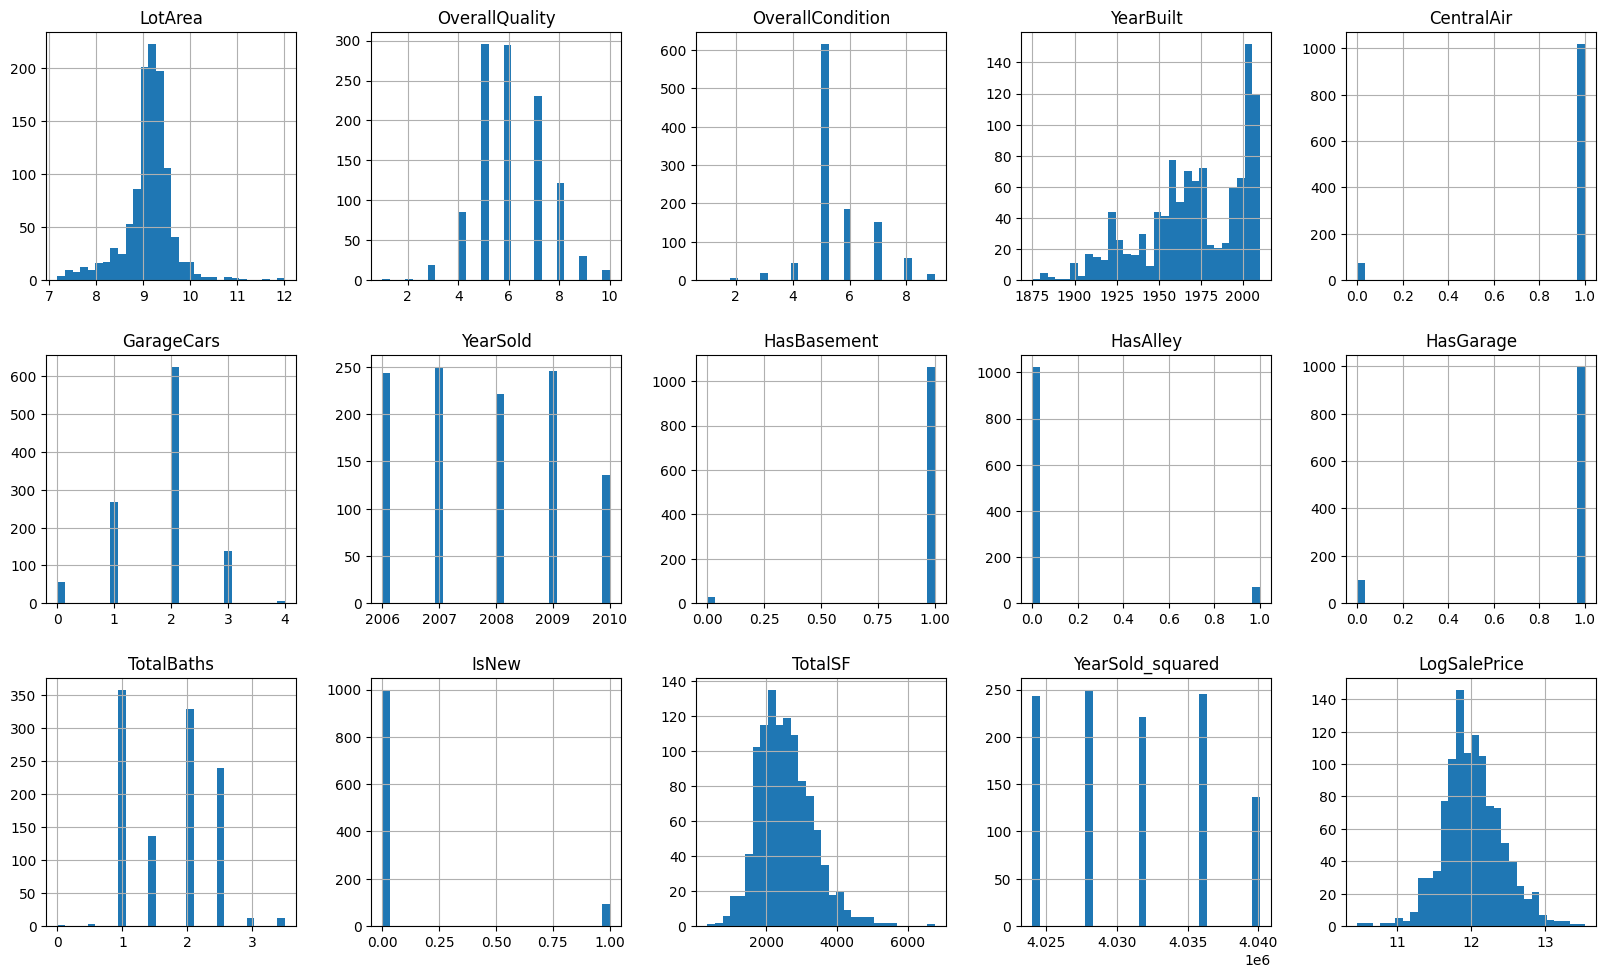

In [95]:
# Plot histograms of all features in the training data as a final check before modeling
train_data.hist(figsize=(20, 20), bins=30, layout=(5, 5), sharex=False, sharey=False)

In [96]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numeric_cols)


Categorical columns: ['LotType', 'BldgType', 'HouseStyle', 'Foundation', 'GarageType']
Numerical columns: ['LotArea', 'OverallQuality', 'OverallCondition', 'YearBuilt', 'CentralAir', 'GarageCars', 'YearSold', 'HasBasement', 'HasAlley', 'HasGarage', 'TotalBaths', 'IsNew', 'TotalSF', 'YearSold_squared']


In [ ]:
# Create a preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


### Model Evaluation

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")


RMSE: 0.1347
R-squared Score: 0.8911


I used RMSE and $R^2$ as my evaluation metrics for the linear regression model because they provide valuable insights into model performance. RMSE (Root Mean Squared Error) measures the average value of the prediction errors in the same units as the target variable, making it easy to interpret how far off predictions are from the logged sale prices. A lower RMSE indicates better model performance. $R^2$ (R-squared) measures the proportion of variance in the target variable that is explained by the model. It provides a sense of how well the model captures the overall variability in housing prices. Together, RMSE and $R^2$ offer a balanced view of both the model’s accuracy and its explanatory power.

My evaluation metric values are as follows:
RMSE: 0.1347
$R^2$: 0.8911

**Interpretation:**

Since the target variable (`SalePrice`) was log-transformed, the RMSE value of **0.1347** is on the log scale. To interpret it in terms of actual sale price dollars, we approximate the multiplicative error:

\[
\text{Approximate Relative Error} = e^{\text{RMSE}_{\text{log}}} - 1
\]

Substituting in our value:

\[
e^{0.1347} - 1 \approx 0.1442
\]

This means the model’s predictions are, on average, off by about **14.4%** relative to the true sale price. 

If the average home sale price in the data is \$180,996, this corresponds to an average prediction error of:

\[
0.1442 \times 180,996 \approx 26083 \text{ dollars}
\]

Thus, the model's RMSE corresponds to an average prediction error of roughly **\$26,000**, which isn't too bad!

The $R^2$ score of **0.8911** indicates that approximately **89.1%** of the variance in the log-transformed sale prices is explained by the model. This suggests that the linear regression model captures most of the underlying patterns in the data, leaving only about 10.9% of the variability unexplained. Given the complexity and noise present in housing market data(especially around a time like the 2008 housing market crash), an $R^2$ of 0.8911 reflects strong model performance.

In [ ]:
# Get feature importances from the linear regression model

# Get the preprocessor from the pipeline
preprocessor = pipeline.named_steps['preprocessor']

# Get the one-hot encoded feature names
numeric_features = X_train.select_dtypes(include='number').columns.tolist()

# Get the names of the categorical features after one-hot encoding
categorical_encoder = preprocessor.named_transformers_['cat']
categorical_feature_names = categorical_encoder.get_feature_names_out(categorical_cols)

# Combine all feature names
all_feature_names = np.concatenate([numeric_features, categorical_feature_names])

# Create the importance DataFrame with the feature names and coefficients
importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': pipeline.named_steps['regressor'].coef_
})

# Sort by absolute value
importance['AbsCoefficient'] = importance['Coefficient'].abs()
importance = importance.sort_values('AbsCoefficient', ascending=False)

print(importance.head(10))

             Feature  Coefficient  AbsCoefficient
6           YearSold   -12.455100       12.455100
13  YearSold_squared    12.452121       12.452121
12           TotalSF     0.179451        0.179451
1     OverallQuality     0.100359        0.100359
17   BldgType_Duplex    -0.090669        0.090669
3          YearBuilt     0.077588        0.077588
2   OverallCondition     0.063259        0.063259
29  GarageType_Other    -0.061573        0.061573
0            LotArea     0.059102        0.059102
25  Foundation_PConc     0.043735        0.043735


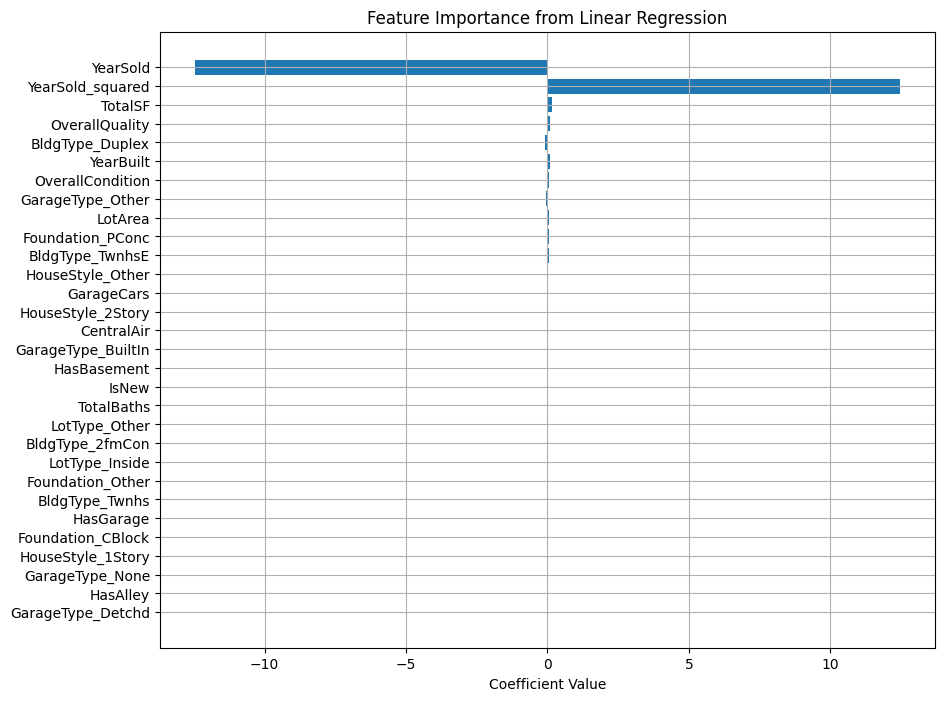

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(importance['Feature'], importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

### Feature Importance Analysis

The most influential features in the linear regression model, based on the magnitude of their coefficients, are `YearSold`, `YearSold_squared`, `TotalSF`, and `OverallQuality`. 

Notably, `YearSold` and `YearSold_squared` have the largest coefficients by a wide margin. This highlights the critical role that the timing of the sale played in determining housing prices during the period covered by the dataset (2006–2010), which includes the 2008 housing market crash. The strong importance of these time-related variables reflects the real-world economic conditions of that era, where home prices were highly sensitive to the timing of the sale due to rapid market fluctuations.

Other important predictors include `TotalSF` (total square footage) and `OverallQuality`, which aligns with expectations and prediction made during the exploratory data analysis portion, as larger and higher-quality homes typically command higher prices. Meanwhile, categorical features such as `BldgType_Duplex` and `GarageType_Other` also showed moderate influence, suggesting that the type of building and garage characteristics had some impact, however smaller than the main time and size-related features.


## Thank you 

Thank you to the Openhouse.ai team for allowing me the opportunity to complete this assessment, I look forward to the next steps in the interview process.

Best regards, 

Andrew Girgis